# Research topics in Data Mining

little introduction here

## Read and preprocess the data

In [21]:
import sys
sys.path.append("..")

from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"
from src.preprocess import read_data
from src.visualization import plot_feature_importance, plot_correlation_matrix, plot_distribution
from src.missing_data import *
import warnings
warnings.filterwarnings('ignore')

CSV_FILE = "../data/data.csv"

X, y = read_data(CSV_FILE)
X.head()
y.head()

Dropping 21 columns...
DataFrame shape: (569, 12)
Label distribution:
0    0.627417
1    0.372583
Name: diagnosis, dtype: float64


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.99,10.38,122.80,1001.0,0.11840,0.27760,0.3001,0.14710,0.2419,0.07871
1,20.57,17.77,132.90,1326.0,0.08474,0.07864,0.0869,0.07017,0.1812,0.05667
2,19.69,21.25,130.00,1203.0,0.10960,0.15990,0.1974,0.12790,0.2069,0.05999
3,11.42,20.38,77.58,386.1,0.14250,0.28390,0.2414,0.10520,0.2597,0.09744
4,20.29,14.34,135.10,1297.0,0.10030,0.13280,0.1980,0.10430,0.1809,0.05883


0    1
1    1
2    1
3    1
4    1
Name: diagnosis, dtype: int64

## Implement missing data functions

### 5% Missing Values

In [22]:
DF_MAR_5 = get_missing_df(X, 0.05, "MAR")
DF_MNAR_5 = get_missing_df(X, 0.05, "MNAR")
DF_MCAR_5 = get_missing_df(X, 0.05, "MCAR")

DF_MAR_5

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.420000,20.379999,77.580002,386.100006,0.14250,0.28390,0.24140,0.10520,0.2597,0.09744
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,NaN,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,20.129999,28.250000,131.199997,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,0.05533
566,16.600000,28.080000,108.300003,858.099976,0.08455,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.600000,29.330000,140.100006,1265.000000,0.11780,0.27700,0.35140,0.15200,NaN,0.07016


### 10% Missing Values

In [23]:
DF_MAR_10 = get_missing_df(X, 0.10, "MAR")
DF_MNAR_10 = get_missing_df(X, 0.10, "MNAR")
DF_MCAR_10 = get_missing_df(X, 0.10, "MCAR")

DF_MNAR_10

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,1001.000000,0.11840,0.27760,0.30010,0.14710,0.2419,0.07871
1,20.570000,17.770000,132.899994,1326.000000,0.08474,0.07864,0.08690,0.07017,0.1812,0.05667
2,19.690001,21.250000,130.000000,1203.000000,0.10960,0.15990,0.19740,0.12790,0.2069,0.05999
3,11.420000,20.379999,77.580002,386.100006,0.14250,NaN,0.24140,0.10520,0.2597,0.09744
4,20.290001,14.340000,135.100006,1297.000000,0.10030,0.13280,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,21.559999,22.389999,NaN,NaN,0.11100,NaN,0.24390,0.13890,0.1726,0.05623
565,20.129999,28.250000,NaN,1261.000000,0.09780,0.10340,0.14400,0.09791,0.1752,NaN
566,16.600000,28.080000,108.300003,858.099976,NaN,0.10230,0.09251,0.05302,0.1590,0.05648
567,20.600000,29.330000,140.100006,1265.000000,NaN,0.27700,0.35140,0.15200,0.2397,0.07016


### 30% Missing Values

In [24]:
DF_MAR_30 = get_missing_df(X, 0.30, "MAR")
DF_MNAR_30 = get_missing_df(X, 0.30, "MNAR")
DF_MCAR_30 = get_missing_df(X, 0.30, "MCAR")

DF_MCAR_30

,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
0,17.990000,10.380000,122.800003,NaN,0.11840,NaN,0.30010,0.14710,0.2419,NaN
1,20.570000,17.770000,132.899994,NaN,0.08474,0.07864,0.08690,NaN,NaN,0.05667
2,19.690001,21.250000,NaN,1203.000000,0.10960,NaN,0.19740,NaN,0.2069,NaN
3,NaN,20.379999,NaN,NaN,0.14250,0.28390,0.24140,0.10520,NaN,0.09744
4,20.290001,14.340000,135.100006,NaN,NaN,NaN,0.19800,0.10430,0.1809,0.05883
...,...,...,...,...,...,...,...,...,...,...
564,NaN,22.389999,142.000000,1479.000000,0.11100,0.11590,0.24390,0.13890,0.1726,0.05623
565,NaN,28.250000,NaN,1261.000000,NaN,0.10340,NaN,0.09791,NaN,0.05533
566,16.600000,28.080000,108.300003,858.099976,NaN,NaN,0.09251,0.05302,0.1590,0.05648
567,20.600000,29.330000,NaN,NaN,0.11780,0.27700,NaN,0.15200,0.2397,0.07016


## Metrics evaluation

In [25]:
X.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.104341
concavity              0.088799
concave points         0.048919
symmetry               0.181162
fractal_dimension      0.062798
dtype: float64

In [26]:
DF_MAR_5.mean()

radius                14.127292
texture               19.289649
perimeter             91.969033
area                 654.889104
smoothness             0.096360
compactness            0.104341
concavity              0.088799
concave points         0.048919
symmetry               0.180759
fractal_dimension      0.062798
dtype: float64

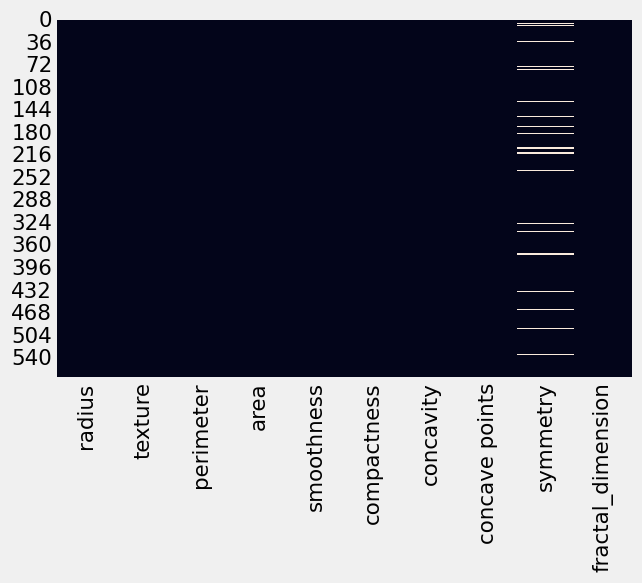

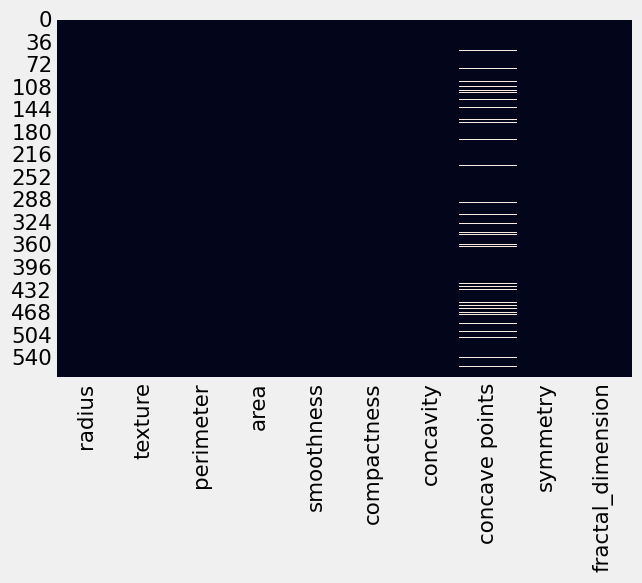

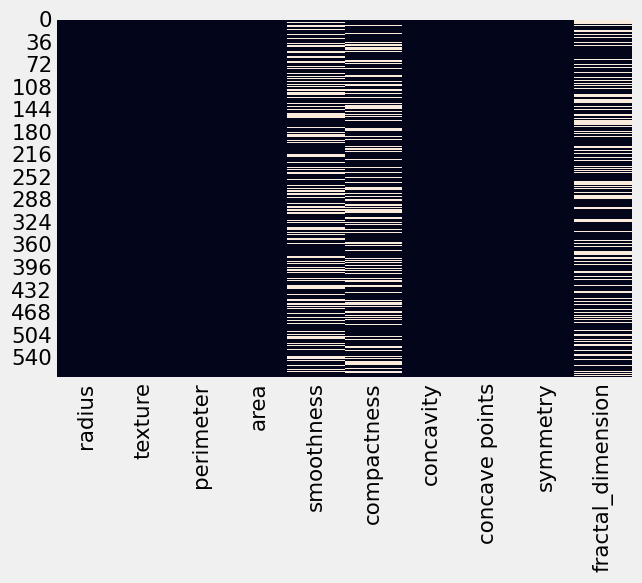

In [27]:
from src.visualization import plot_missing_data


plot_missing_data(DF_MAR_5)
plot_missing_data(DF_MAR_10)
plot_missing_data(DF_MAR_30)

In [28]:
apply_metrics(X, DF_MAR_5)

[(13.837116555072159, 14.417466931072537), (18.935495128467096, 19.6438019288875), (89.96822067261496, 93.96984592725272), (625.9119942670562, 683.8662133610297), (0.09520222100326187, 0.09751834158299455), (0.0999923067350324, 0.10868966186059723), (0.08223507342137612, 0.09536355815522446), (0.04572406456448159, 0.05211422738012698), (0.17852043642216864, 0.18299806868206564), (0.062216249416986315, 0.06337897004250966)]
[1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0, 1.0]


,radius,texture,perimeter,area,smoothness,compactness,concavity,concave points,symmetry,fractal_dimension
Real Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.181162,0.062798
Predicted Mean,14.127292,19.289649,91.969033,654.889104,0.09636,0.104341,0.088799,0.048919,0.180759,0.062798
Bias,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000403,0.0
Confidence Interval,"(13.837116555072159, 14.417466931072537)","(18.935495128467096, 19.6438019288875)","(89.96822067261496, 93.96984592725272)","(625.9119942670562, 683.8662133610297)","(0.09520222100326187, 0.09751834158299455)","(0.0999923067350324, 0.10868966186059723)","(0.08223507342137612, 0.09536355815522446)","(0.04572406456448159, 0.05211422738012698)","(0.17852043642216864, 0.18299806868206564)","(0.062216249416986315, 0.06337897004250966)"
Coverage Rate,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0,1.0


## ML model pipeline for classification

In [29]:
from sklearn.model_selection import train_test_split


X_train, X_test, y_train, y_test = train_test_split(X, y,
                                                    random_state=42,
                                                    stratify=y,
                                                    train_size=0.7)

# Amputation
Ampute X_train here. Let's leave the X_test set without any amputation so that we can compare how the amputation in the training set is affecting the predictions on a full test set. 

In [30]:
from src.model import train

rf = train(X_train, y_train)

In [31]:
pred = rf.predict(X_test)

## Evaluate somehow our results

              precision    recall  f1-score   support

           0       0.94      0.96      0.95       107
           1       0.93      0.89      0.91        64

    accuracy                           0.94       171
   macro avg       0.94      0.93      0.93       171
weighted avg       0.94      0.94      0.94       171



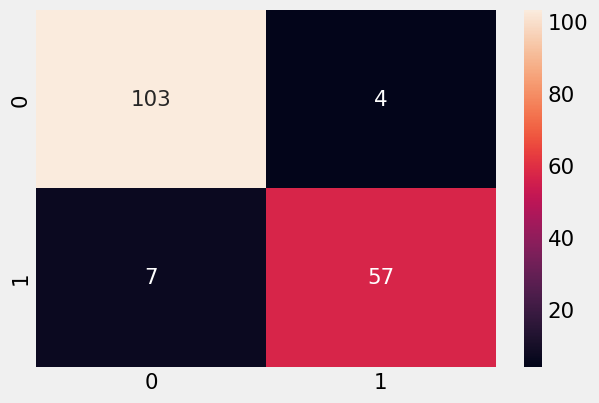

In [32]:
from sklearn.metrics import classification_report
from src.visualization import plot_confusion_matrix

print(classification_report(y_test, pred))
plot_confusion_matrix(y_test, pred, [0, 1])

In [33]:
import pandas as pd

feature_scores = pd.Series(rf["rf"].feature_importances_, index=X_train.columns).sort_values(ascending=False)
feature_scores

concave points       0.310279
perimeter            0.161415
area                 0.150901
radius               0.144392
concavity            0.133058
compactness          0.041738
texture              0.031813
smoothness           0.013322
fractal_dimension    0.006805
symmetry             0.006277
dtype: float64

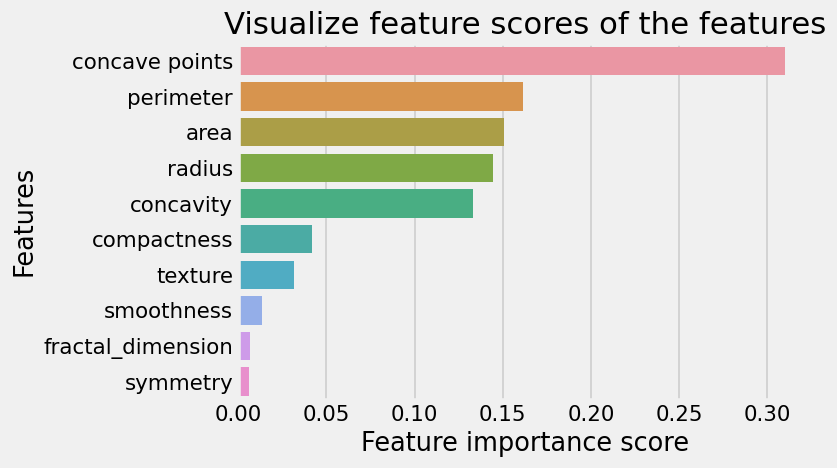

In [34]:
plot_feature_importance(feature_scores)

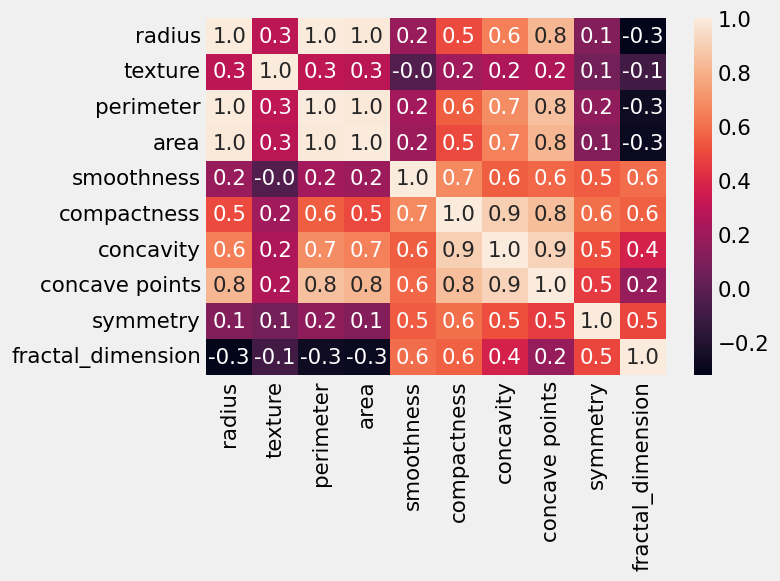

In [35]:
plot_correlation_matrix(X_train)

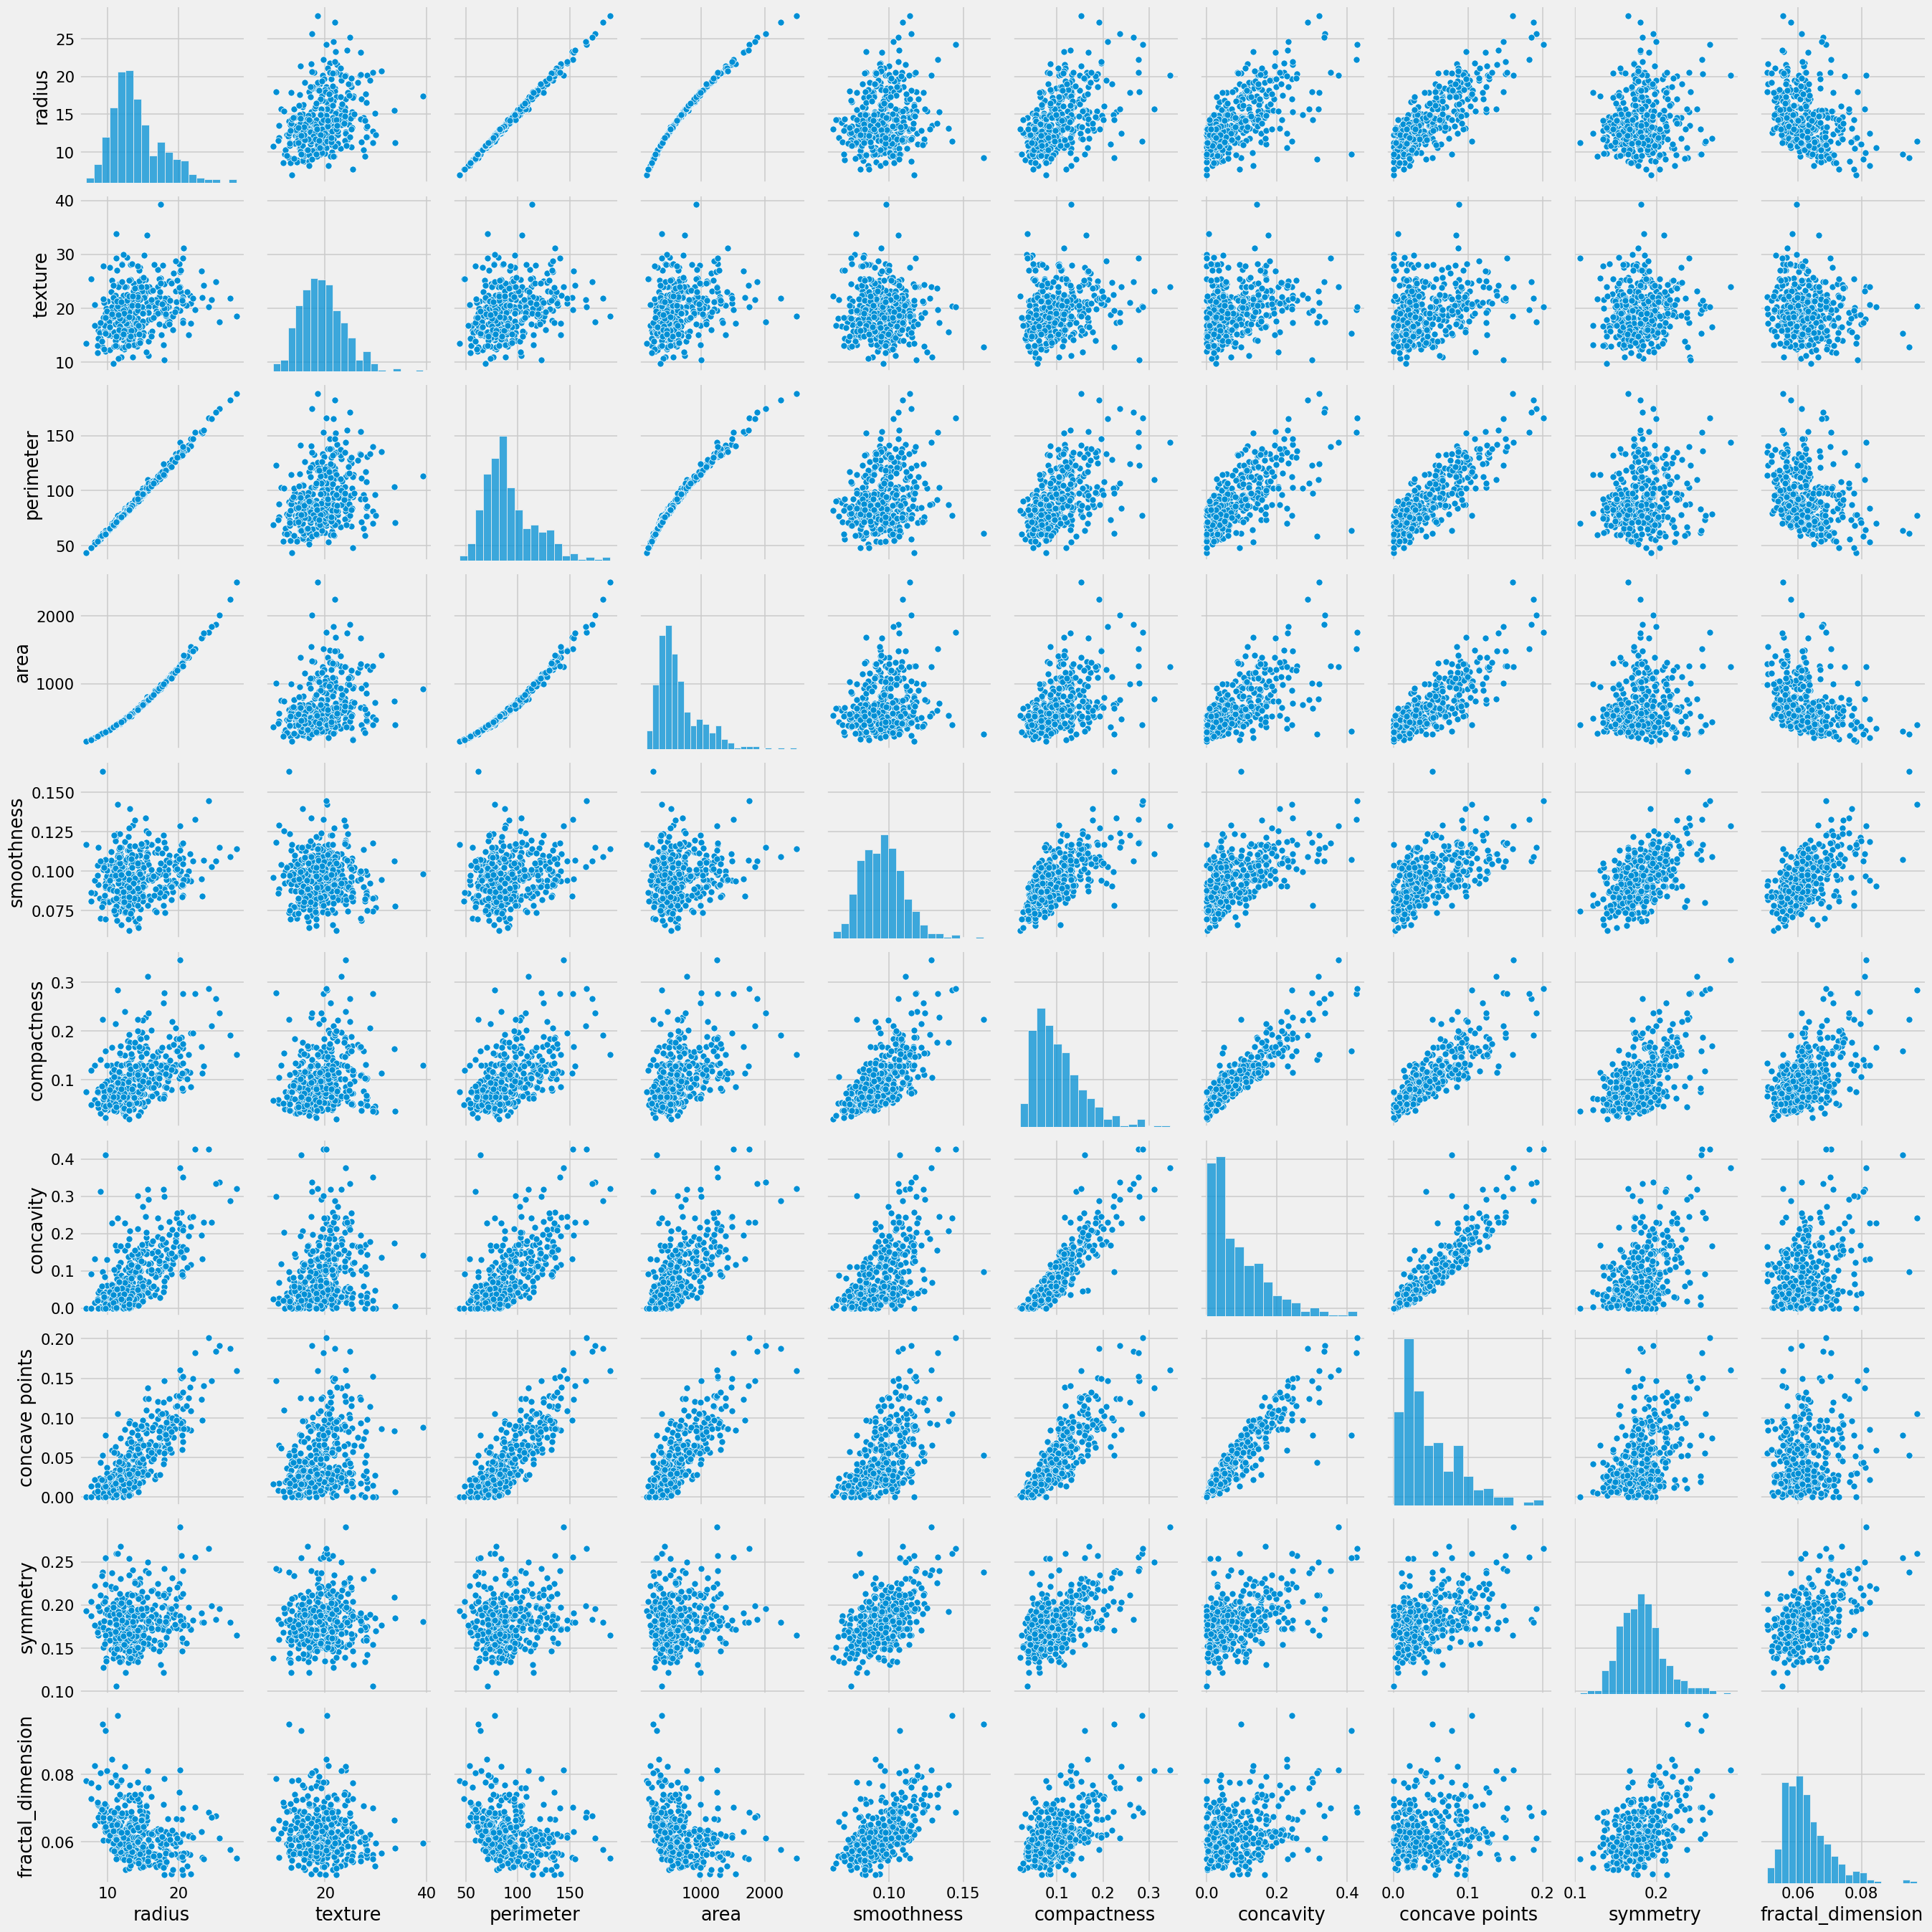

In [36]:
from src.visualization import plot_pairplot

plot_pairplot(X_train, X_train.columns)

# Mean for every column

In [37]:
X_train.mean()

radius                14.126503
texture               19.438241
perimeter             91.904422
area                 655.325377
smoothness             0.095857
compactness            0.102648
concavity              0.088497
concave points         0.048535
symmetry               0.181364
fractal_dimension      0.062620
dtype: float64

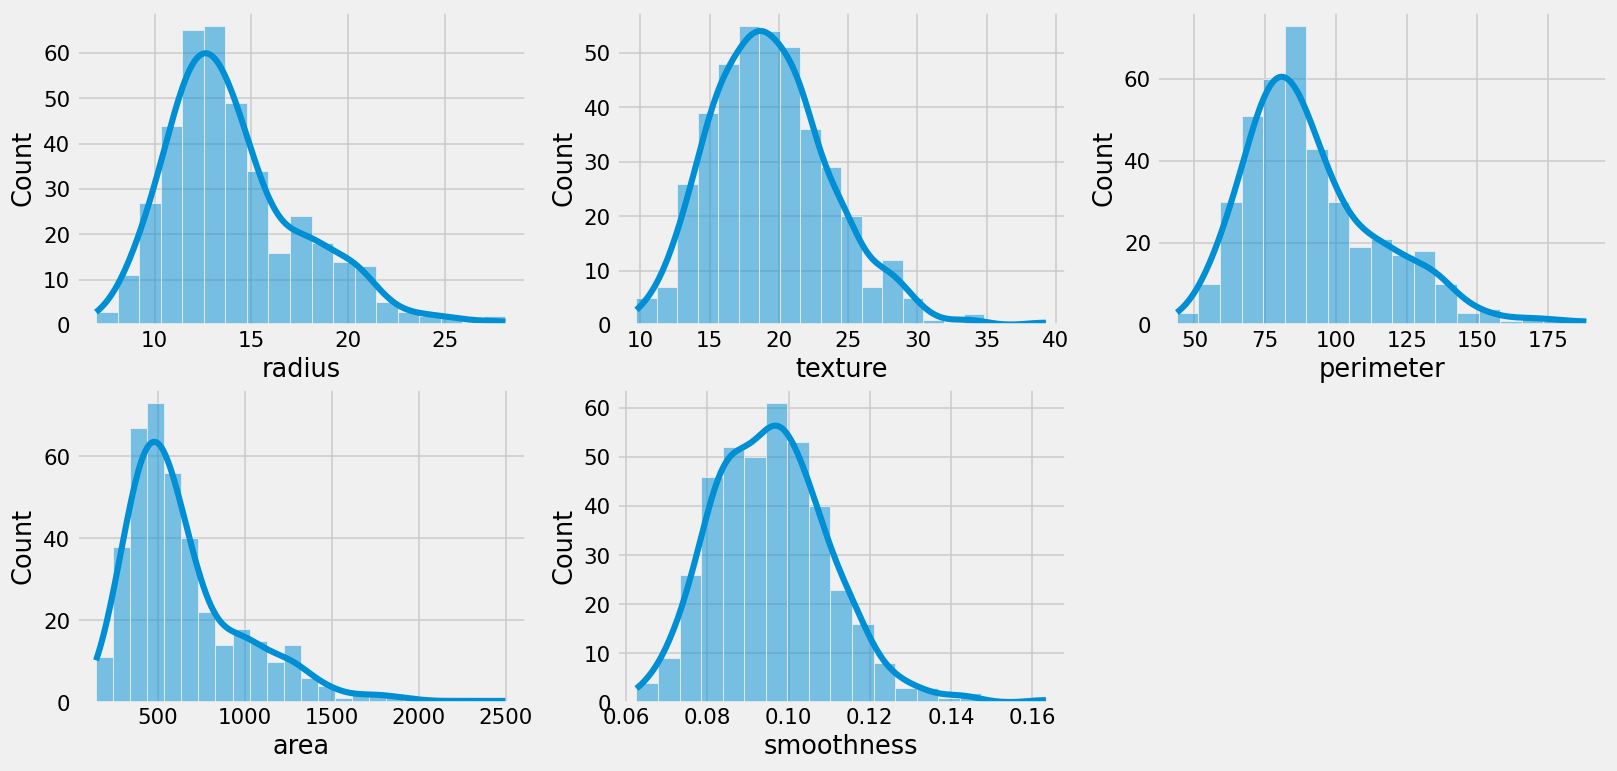

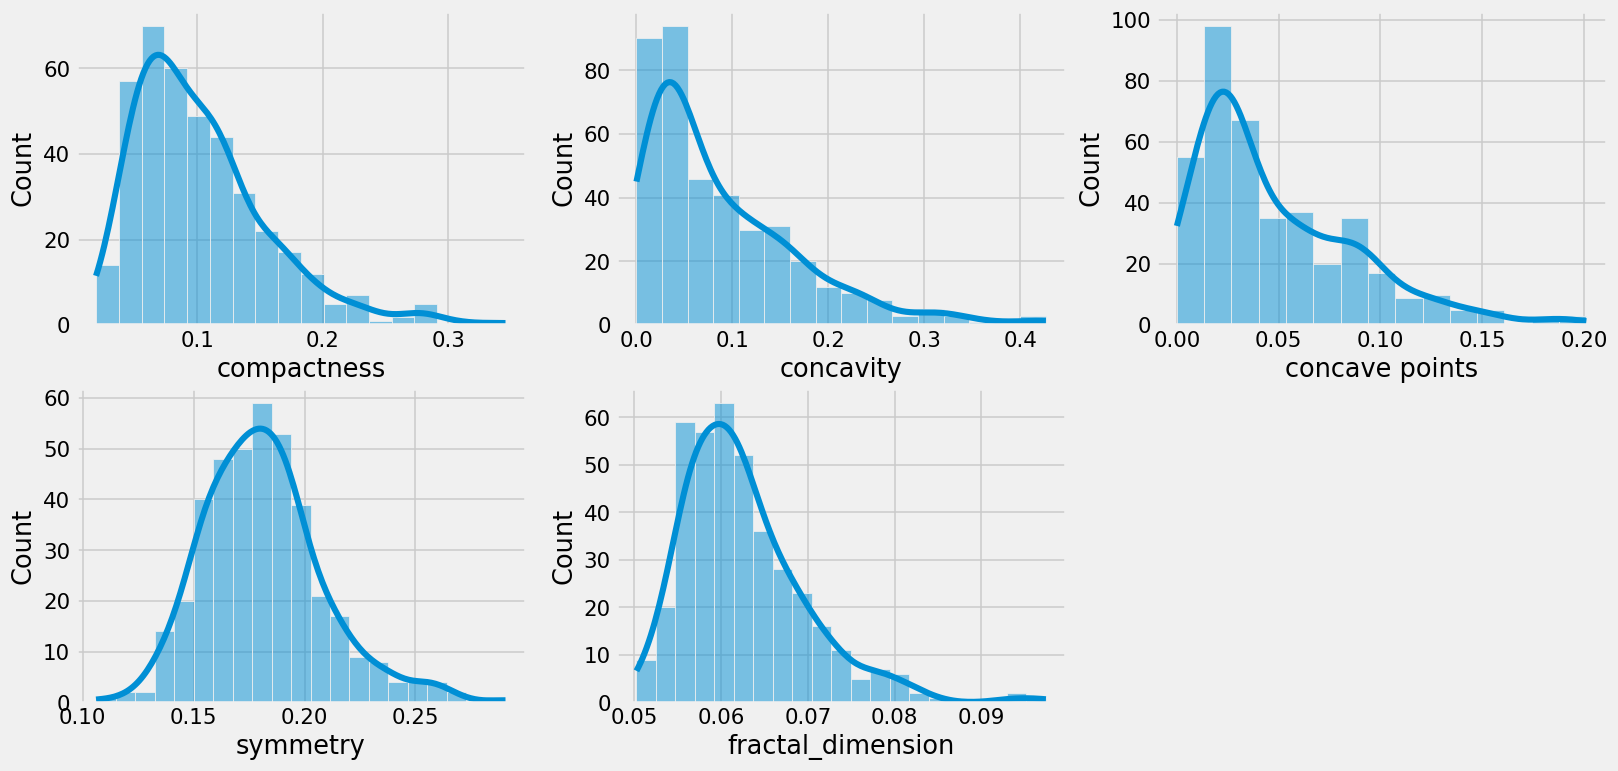

In [38]:
from src.visualization import plot_multiple_distribution_grid

plot_multiple_distribution_grid(X_train, X_train.columns[:5])
plot_multiple_distribution_grid(X_train, X_train.columns[5:])

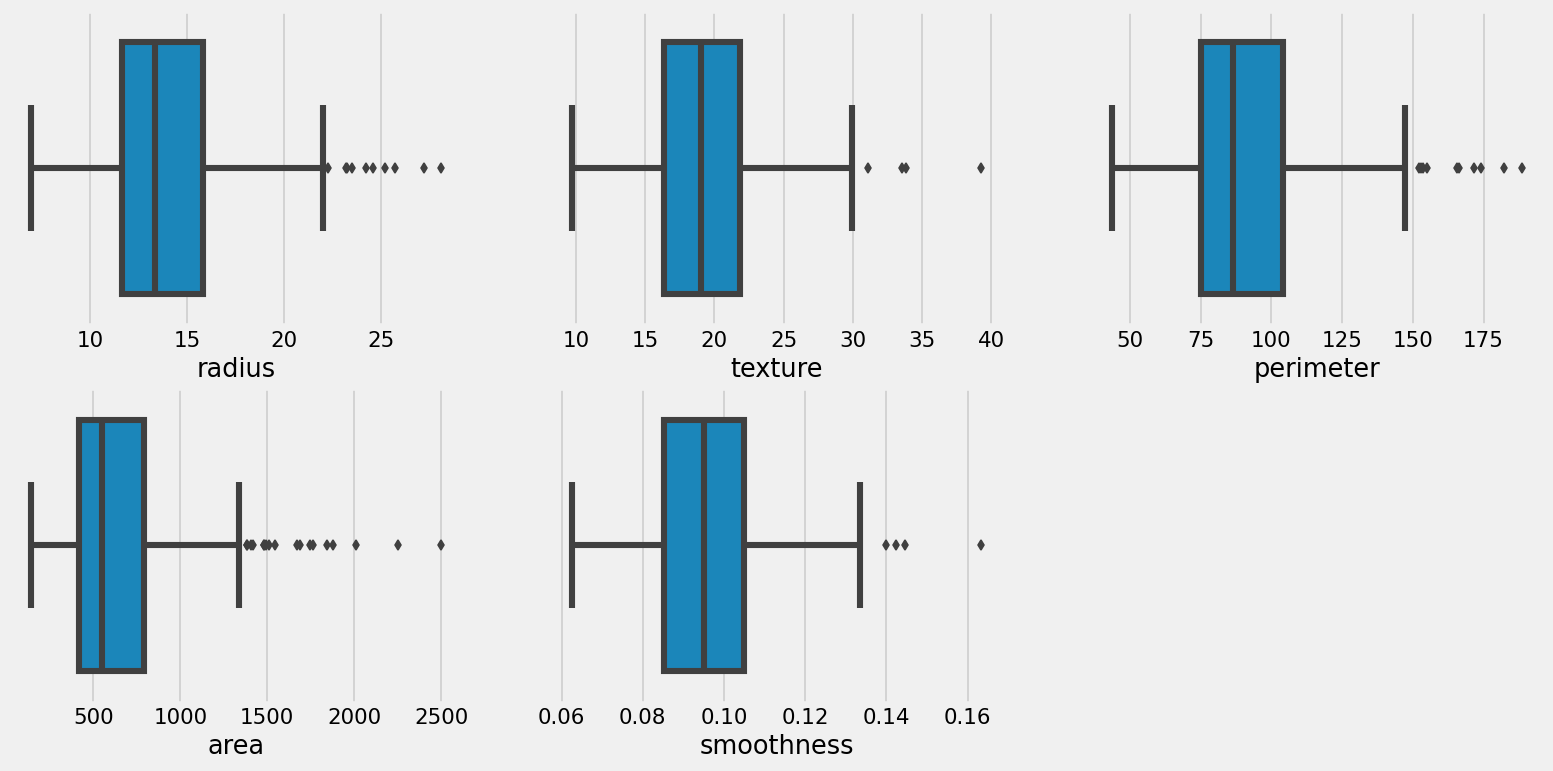

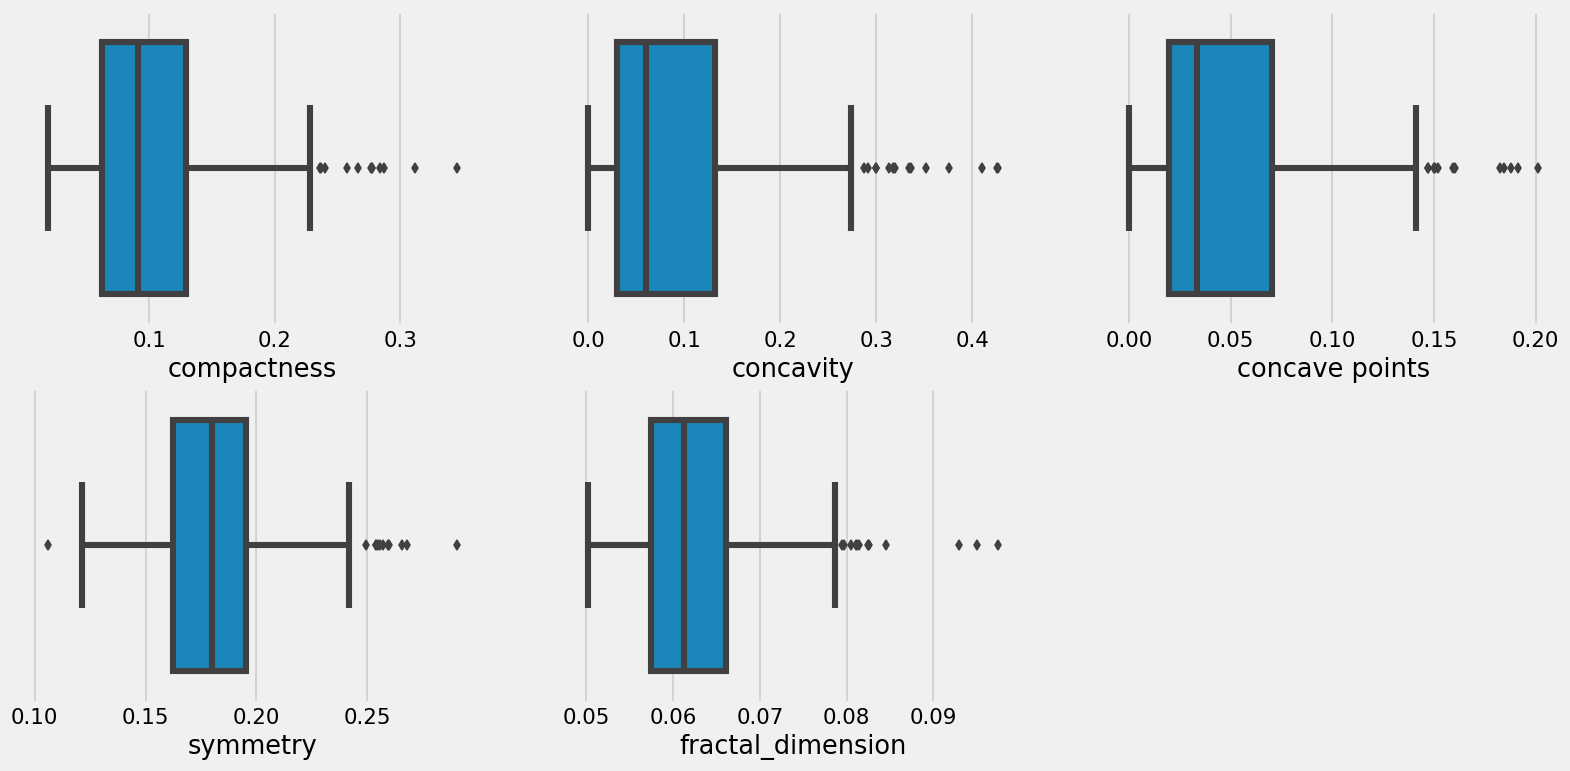

In [39]:
from src.visualization import plot_multiple_boxplot_grid

plot_multiple_boxplot_grid(X_train, X_train.columns[:5])
plot_multiple_boxplot_grid(X_train, X_train.columns[5:])

In [40]:
# from src.visualization import plot_boxplot
# 
# for col in X_train:
#     plot_distribution(X_train[col])
#     plot_boxplot(X_train[col])